In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
from IPython.display import display
from sympy.plotting import PlotGrid, plot
from sympy.plotting.plot import MatplotlibBackend

In [2]:
sympy.sqrt(8)

2*sqrt(2)

In [3]:
x, y = sympy.symbols("x y")
expr = x + 2 * y
expr

x + 2*y

In [4]:
expr + 1

x + 2*y + 1

In [5]:
expr - x

2*y

In [6]:
x * expr

x*(x + 2*y)

In [7]:
sympy.expand(x * expr)

x**2 + 2*x*y

In [8]:
expr = sympy.cos(2 * sympy.pi * x) + x**2
expr_diff = sympy.diff(expr)

In [9]:
display(expr)
display(expr_diff)

x**2 + cos(2*pi*x)

2*x - 2*pi*sin(2*pi*x)

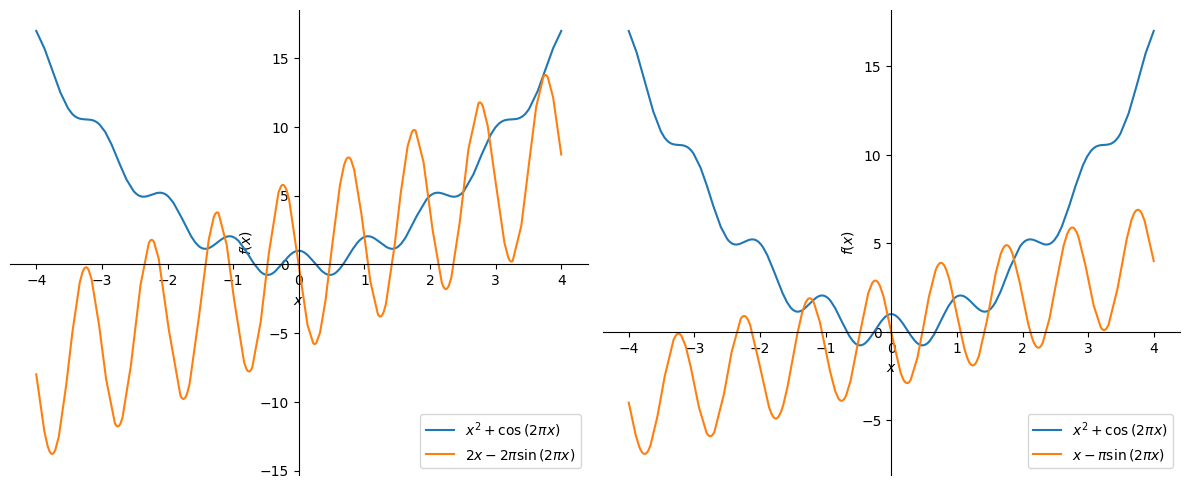

In [10]:
p1 = plot(expr, expr_diff, (x, -4, 4), legend=True, show=False)
p2 = plot(expr, expr_diff / 2, (x, -4, 4), legend=True, show=False)

grid = PlotGrid(1, 2, p1, p2, show=False, size=(12, 5))
grid.show()

In [11]:
print(type(p1[0]))

<class 'sympy.plotting.plot.LineOver1DRangeSeries'>


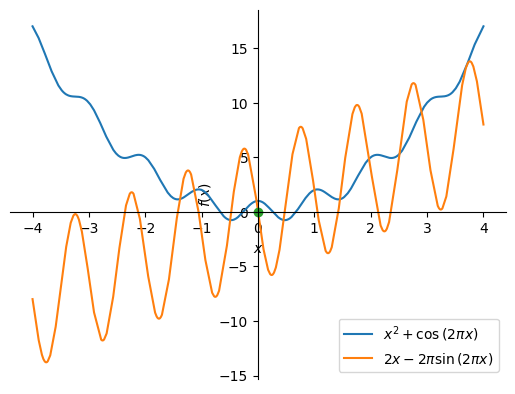

In [12]:
mpl_be = MatplotlibBackend(p1)
mpl_be.process_series()
mpl_be.plt.plot([0], "o")

In [13]:
ls = np.linspace(-2, 2, 2001)

localmin = np.random.choice(ls)
learning_rate = 0.01
learning_epoch = 100

fx = sympy.lambdify(x, expr)
diff_eq = sympy.lambdify(x, expr_diff)

for i in range(learning_epoch):
    grad = diff_eq(localmin)
    localmin = localmin - learning_rate * grad

localmin

1.4250674148261986

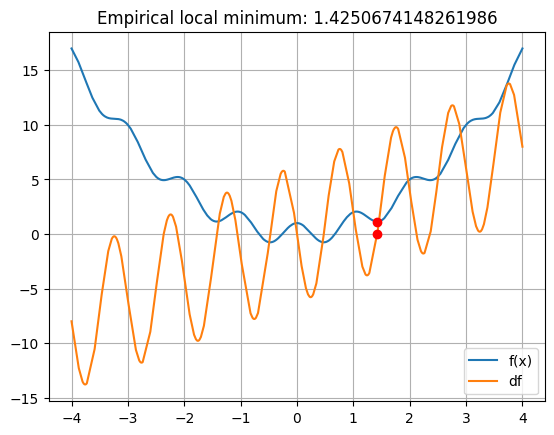

In [14]:
x_coor, y_coor = p1[0].get_points()
x_coor_diff, y_coor_diff = p1[1].get_points()

y_localmin = fx(localmin)
y_grad = diff_eq(localmin)

fig, ax = plt.subplots()
line_fx, *_ = ax.plot(x_coor, y_coor, label="f(x)")
line_df, *_ = ax.plot(x_coor_diff, y_coor_diff, label="df")
ax.plot(localmin, y_localmin, "ro")
ax.plot(localmin, y_grad, "ro")
ax.set_title(f"Empirical local minimum: {localmin}")
ax.grid()
ax.legend(handles=[line_fx, line_df])

plt.show()